In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')
gender_submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [3]:
#最初の５行を表示
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#行数と列数を確認
print(train.shape)
print(test.shape)
print(gender_submission.shape)

(891, 12)
(418, 11)
(418, 2)


In [5]:
#列の名前の確認
print(train.columns)
print('-'*10)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
----------
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
#各列の欠損値、typeを調べる
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#欠損値がいくつあるか確認
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#要約統計量の表示
df_full = pd.concat([train,test],axis=0,sort=False)
print(df_full.shape) #df_fullの行数と列数を確認

df_full.describe() #df_fullの要約統計量

(1309, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
#describeは引数にパーセンタイルを指定できる

df_full.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
10%,131.800000,0.000000,1.000000,14.000000,0.000000,0.000000,7.567500
20%,262.600000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,393.400000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,524.200000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,785.800000,0.000000,3.000000,31.000000,0.000000,0.000000,21.679200


In [10]:
#include引数にOを指定すると、再頻出値などを表示

df_full.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [11]:
from pandas_profiling import ProfileReport

profile = pdp.ProfileReport(train)

profile

NameError: name 'pdp' is not defined

In [ ]:
#以降のデータ可視化処理のためにimport
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#グラフでデータの量を可視化する
sns.countplot(x='Survived',data=train)
plt.title('Number')
plt.xticks([0,1],['Dead','Survive'])
plt.show()

In [ ]:
#数値をクロスで可視化
sns.countplot(x='Sex',hue='Survived',data=train)
plt.title('dead and survived number of sex type')
plt.legend(['dead','survived'])
plt.show()

#クロス集計値を表で表示
display(pd.crosstab(train['Sex'],train['Survived']))

#クロス集計値をsexごとに正規化
display(pd.crosstab(train['Sex'],train['Survived'],normalize='index'))

In [ ]:
#ヒストグラムを表示
#distplotではなく、displotを使うよう警告が出る

sns.distplot(train['Age'].dropna(),kde=False,bins=30,label='entire')

sns.distplot(train[train['Survived']==0].Age.dropna(),kde=False,bins=30,label='dead')

sns.distplot(train[train['Survived']==1].Age.dropna(),kde=False,bins=30,label='survived')

In [ ]:
#ある数値に対する相関を調べるための処理
#この例では年齢を8つの区分に分類して、生死の数を可視化

train['CategoricalAge'] = pd.cut(train['Age'],8)
      
display(pd.crosstab(train['CategoricalAge'],train['Survived']))

#↑の正規化したもの
display(pd.crosstab(train['CategoricalAge'],train['Survived'],normalize='index'))
      

In [ ]:
#↑の処理と同じく、運賃を4つの区分に分けて、生存者の分布を調べる

train['CategoricalFare'] = pd.qcut(train['Fare'],4)
train[['CategoricalFare','Survived']].groupby(['CategoricalFare'],as_index=False).mean()

display(pd.crosstab(train['CategoricalFare'],train['Survived']))

display(pd.crosstab(train['CategoricalFare'],train['Survived'],normalize='index'))


In [ ]:
#名前から敬称だけを抽出する
set(train.Name.str.extract('([A-Za-z]+)\.',expand=False))

#それをcountする
train.Name.str.extract('([A-Za-z]+)\.',expand=False).value_counts()

In [13]:
######以下前処理################

#SexとEmbarkedのone-hotコーディング
#Sex_female列とSex_male列、Embarked_C、Q、Sの列が加わり、該当=１,非該当=0になる
train = pd.get_dummies(train,columns=['Sex','Embarked'])
test = pd.get_dummies(test,columns=['Sex','Embarked'])

#不要な列の削除
train.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)
test.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)

display(train.head())

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [16]:
#以下LightGBMを使用。↑で欠損値の処理などはしていないが、LightGBMは以下の特徴があるため、このまま使える

#ホールドアウト法を使用
#欠損値をそのまま扱える
#カテゴリ変数の指定ができる
#特徴量のスケーリングが不要

#X_trainにSuvived列以外を、y_trainにSurvived列を渡す
X_train = train.drop(['Survived'],axis=1)
y_train = train['Survived']

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#trainとvalidに分割
train_x,valid_x,train_y,valid_y = train_test_split(X_train,y_train,test_size=0.33,random_state=0)

#lgb.datasetでtrainとvalidを作っておく
lgb_train = lgb.Dataset(train_x,train_y)
lgb_eval = lgb.Dataset(valid_x,valid_y)

#パラメータを定義
lgbm_params = {'objective':'binary'}

#lgb.trainで学習
evals_result = {}
gbm = lgb.train(params=lgbm_params,train_set=lgb_train,
               valid_sets=[lgb_train,lgb_eval],early_stopping_rounds=20,evals_result=evals_result,verbose_eval=10)

[LightGBM] [Info] Number of positive: 231, number of negative: 365
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 189
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.387584 -> initscore=-0.457480
[LightGBM] [Info] Start training from score -0.457480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [18]:
#学習結果が、valid_xに対してどれくらい有効か確認
oof = (gbm.predict(valid_x)>0.5).astype(int)
print('score',round(accuracy_score(valid_y,oof)*100,2))

score 82.37


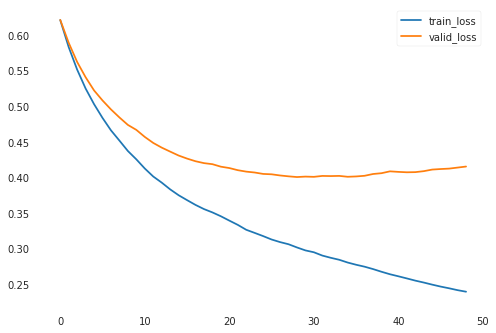

In [22]:
#学習結果がevals_resultに格納されているので、
#学習曲線がどんなものだったかをプロット

import matplotlib.pyplot as plt

plt.plot(evals_result['training']['binary_logloss'],label='train_loss')
plt.plot(evals_result['valid_1']['binary_logloss'],label='valid_loss')
plt.legend()

In [ ]:
#